In [3]:
import pandas as pd

# Load CSVs
customers_df = pd.read_csv("customers.csv")
products_df = pd.read_csv("products.csv")
sales_df = pd.read_csv("sales.csv")


In [4]:
import sqlite3

# Create SQLite DB
conn = sqlite3.connect("mini_warehouse.db")
cursor = conn.cursor()

# Write tables
customers_df.to_sql("customers", conn, if_exists="replace", index=False)
products_df.to_sql("products", conn, if_exists="replace", index=False)
sales_df.to_sql("sales", conn, if_exists="replace", index=False)


50

In [5]:
#Total Revenue Per PRODUCT
query = """
SELECT 
    p.name AS product,
    SUM(s.quantity * p.price) AS total_revenue
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.name
ORDER BY total_revenue DESC
"""
pd.read_sql_query(query, conn)


,product,total_revenue
0,Headphones,799.84
1,Mouse,719.76
2,Jeans,679.83
3,Backpack,363.86
4,Water Bottle,339.66
5,Lamp,229.90
6,Coffee Mug,124.90
7,Socks,124.75
8,Notebook,89.85
9,T-Shirt,79.96


In [6]:
# TOP 5 Customers 
query = """
SELECT 
    c.name AS customer,
    SUM(s.quantity * p.price) AS total_spent
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
JOIN products p ON s.product_id = p.product_id
GROUP BY c.name
ORDER BY total_spent DESC
LIMIT 5
"""
pd.read_sql_query(query, conn)


,customer,total_spent
0,Amanda Jenkins DDS,479.87
1,Mr. Jason Rodriguez,444.82
2,Taylor Ryan,249.95
3,Allison Moore,239.93
4,Courtney Meyer,239.92


In [7]:
query = """
SELECT 
    c.region,
    COUNT(*) AS num_sales
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
GROUP BY c.region
"""
pd.read_sql_query(query, conn)


,region,num_sales
0,East,9
1,North,11
2,South,17
3,West,13


In [8]:
# Sales Count By Region
query_avg_quantity = """
SELECT 
    p.name AS product,
    AVG(s.quantity) AS avg_quantity
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.name
ORDER BY avg_quantity DESC
"""
avg_quantity_df = pd.read_sql_query(query_avg_quantity, conn)
avg_quantity_df


,product,avg_quantity
0,Jeans,4.250000
1,Headphones,4.000000
2,Notebook,3.750000
3,Socks,3.571429
4,Backpack,3.500000
5,Mouse,3.428571
6,Lamp,3.333333
7,Coffee Mug,3.333333
8,Water Bottle,3.090909
9,T-Shirt,1.333333


In [9]:
#Average Quantity Sold Per Product
query_category_revenue = """
SELECT 
    p.category,
    SUM(s.quantity * p.price) AS total_revenue
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.category
ORDER BY total_revenue DESC
"""
category_revenue_df = pd.read_sql_query(query_category_revenue, conn)
category_revenue_df


,category,total_revenue
0,Electronics,1519.60
1,Apparel,884.54
2,Home,694.46
3,Accessories,363.86
4,Stationery,89.85


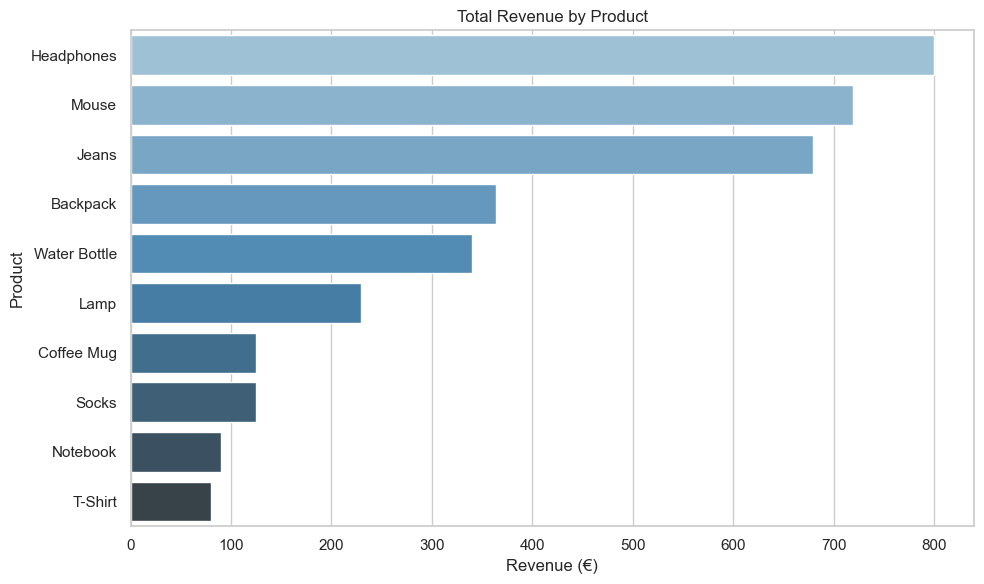

In [10]:
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
#  Total revenue per product
query = """
SELECT 
    p.name AS product,
    SUM(s.quantity * p.price) AS total_revenue
FROM sales s
JOIN products p ON s.product_id = p.product_id
GROUP BY p.name
ORDER BY total_revenue DESC
"""
product_revenue_df = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=product_revenue_df, x='total_revenue', y='product', palette='Blues_d')
plt.title("Total Revenue by Product")
plt.xlabel("Revenue (€)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


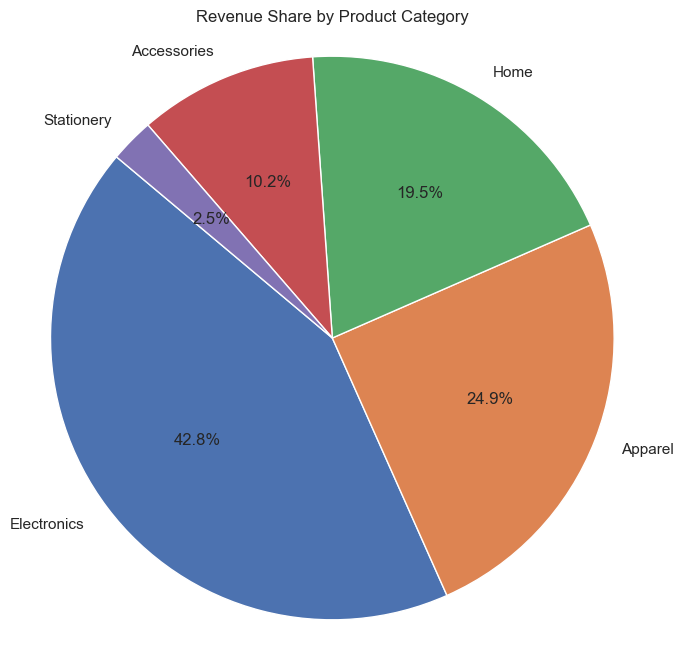

In [11]:
#Revenue by Category
plt.figure(figsize=(8,8))
plt.pie(category_revenue_df['total_revenue'], labels=category_revenue_df['category'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Product Category")
plt.axis('equal')
plt.show()


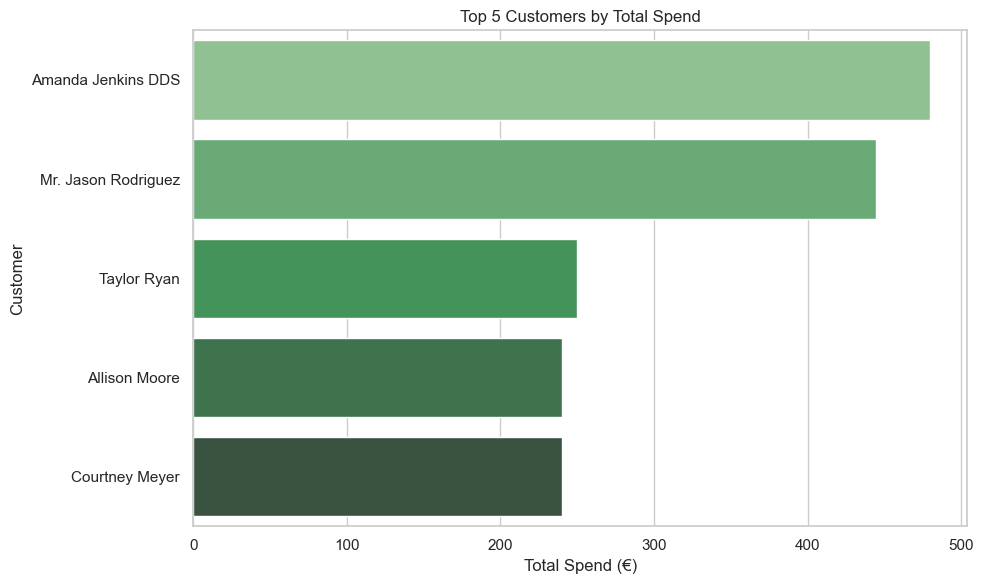

In [12]:
#Top 5 Customer by spend
query_top_customers = """"
SELECT 
    c.name AS customer,
    SUM(s.quantity * p.price) AS total_spent
FROM sales s
JOIN customers c ON s.customer_id = c.customer_id
JOIN products p ON s.product_id = p.product_id
GROUP BY c.name
ORDER BY total_spent DESC
LIMIT 5
""""
top_customers_df = pd.read_sql_query(query_top_customers, conn)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_customers_df, x='total_spent', y='customer', palette='Greens_d')
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Total Spend (€)")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()


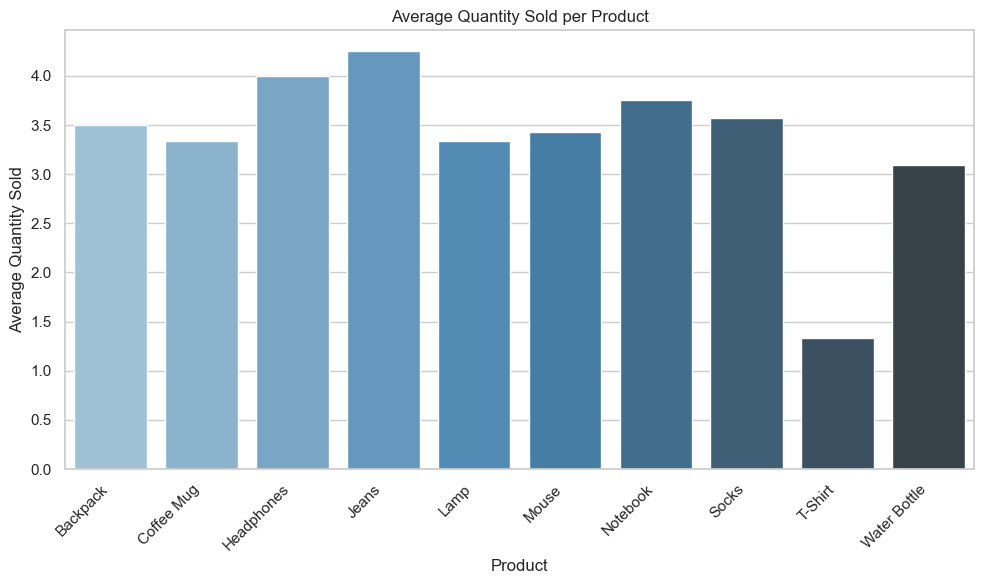

In [15]:
#Average Quantity Sold per Product

sales_df = pd.read_csv('sales.csv')
products_df = pd.read_csv('products.csv')

# Merge the sales and products data to get the product names along with sales data
merged_df = pd.merge(sales_df, products_df, left_on='product_id', right_on='product_id')

# Group by product name and calculate average quantity sold
avg_quantity = merged_df.groupby('name')['quantity'].mean().reset_index()

# bar chart for average quantity sold per product
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_quantity, x='name', y='quantity', palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.title('Average Quantity Sold per Product')
plt.xlabel('Product')
plt.ylabel('Average Quantity Sold')
plt.tight_layout()


# Show the plot
plt.show()


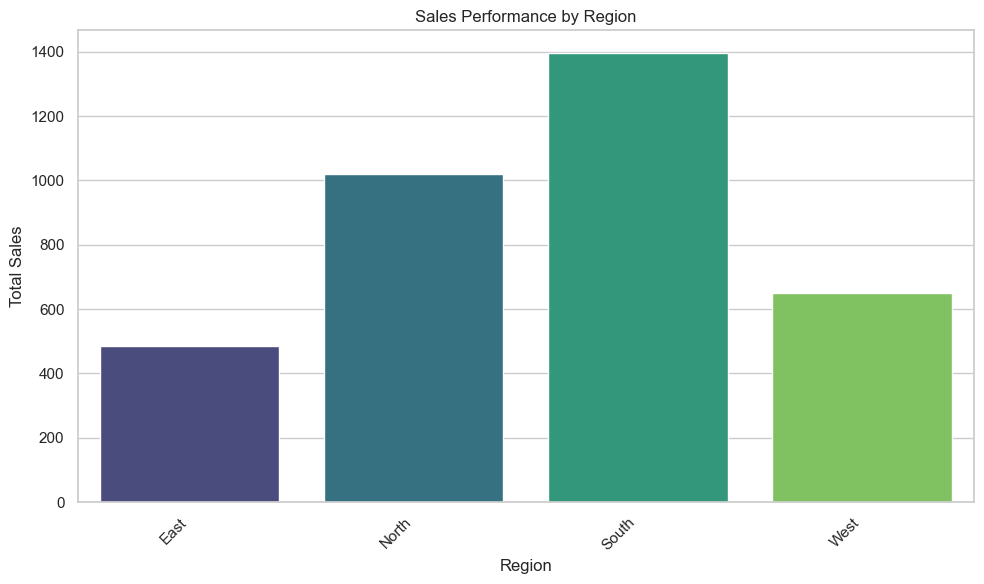

In [18]:
#Sales Performance by Region

# Load sales, products, and customers data
sales_df = pd.read_csv('sales.csv')
products_df = pd.read_csv('products.csv')
customers_df = pd.read_csv('customers.csv')

# sales with products data to get product names
merged_df = pd.merge(sales_df, products_df, left_on='product_id', right_on='product_id')

# result with customers data to get the region information
merged_df = pd.merge(merged_df, customers_df, left_on='customer_id', right_on='customer_id')

# Calculate total sales (quantity * price)
merged_df['total_sales'] = merged_df['quantity'] * merged_df['price']

# Group by region and calculate total sales per region
sales_by_region = merged_df.groupby('region')['total_sales'].sum().reset_index()

# Create a bar chart for total sales performance by region
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region, x='region', y='total_sales', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()

# Show the plot
plt.show()